In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/vgsales new.csv')

In [2]:
# Preprocessing
# Handle missing values for 'Year' and 'Publisher' using the most frequent value
imputer = SimpleImputer(strategy="most_frequent")
data['Year'] = imputer.fit_transform(data[['Year']]).ravel() # Flatten the output to 1D
data['Publisher'] = imputer.fit_transform(data[['Publisher']]).ravel() # Flatten the output to 1D

In [ ]:
# Encode categorical columns ('Platform', 'Genre', 'Publisher')
label_encoders = {}
for col in ['Platform', 'Genre', 'Publisher']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Normalize numerical columns ('Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales')
scaler = StandardScaler()
scaled_columns = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

In [ ]:
# Gradient Boosting Regressor
# Define features and target
X = data.drop(columns=['Rank', 'Name', 'Global_Sales'])
y = data['Global_Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Results:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Gradient Boosting Results:
Mean Squared Error: 0.2568348500348753
R-squared: 0.8463194389421568


In [ ]:
# Hierarchical Clustering
# Select relevant sales columns for clustering
clustering_features = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Perform sampling to reduce dataset size for hierarchical clustering
sampled_data = clustering_features.sample(n=1000, random_state=42)

# Perform hierarchical clustering on sampled data
linkage_matrix = linkage(sampled_data, method='ward')

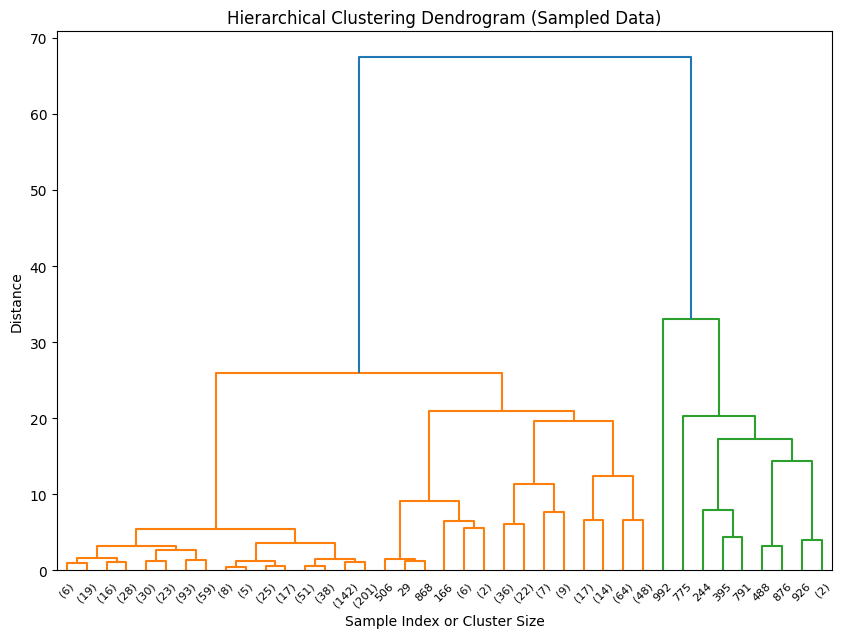

In [ ]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Sampled Data)")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.show()

In [ ]:
# Determine clusters (e.g., 4 clusters as an example)
clusters = fcluster(linkage_matrix, t=4, criterion='maxclust')
sampled_data['Cluster'] = clusters

# Display cluster assignment
print("Cluster Assignments:")
print(sampled_data['Cluster'].value_counts())# Hierarchical Clustering

Cluster Assignments:
Cluster
1    761
2    229
3      9
4      1
Name: count, dtype: int64


In [ ]:
# Select relevant sales columns for clustering
clustering_features = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Perform sampling to reduce dataset size for hierarchical clustering
sampled_data = clustering_features.sample(n=1000, random_state=42)

# Perform hierarchical clustering on sampled data
linkage_matrix = linkage(sampled_data, method='ward')

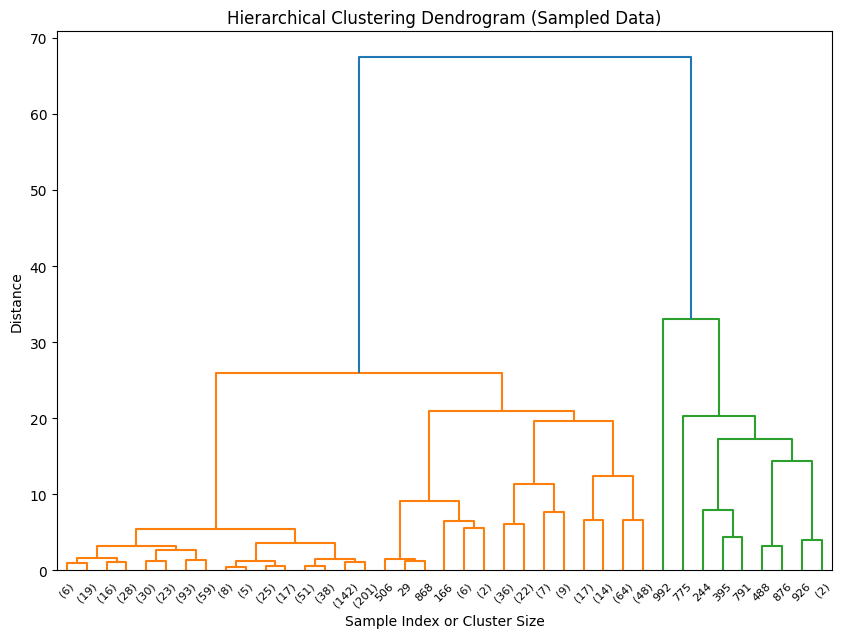

In [ ]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Sampled Data)")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.show()

In [ ]:
# Determine clusters (e.g., 4 clusters as an example)
clusters = fcluster(linkage_matrix, t=4, criterion='maxclust')
sampled_data['Cluster'] = clusters

# Display cluster assignment
print("Cluster Assignments:")
print(sampled_data['Cluster'].value_counts())

Cluster Assignments:
Cluster
1    761
2    229
3      9
4      1
Name: count, dtype: int64
